In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio

import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm.notebook import tqdm

from torchaudio.datasets import SPEECHCOMMANDS
import os

# Create training and testing split of the data. We do not use validation in this tutorial.
train_set = SPEECHCOMMANDS("./",subset="training")
#test_set = SubsetSC("testing")

waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


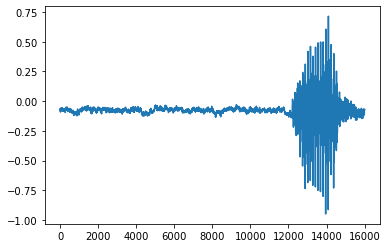

In [3]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.plot(waveform.t().numpy());

torch.Size([1, 16000])
torch.Size([1, 80, 81])


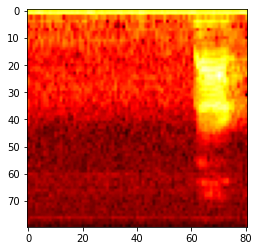

In [9]:
transform=nn.Sequential(torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_mels=80),torchaudio.transforms.AmplitudeToDB())
print(waveform.shape)
transformed = transform(waveform)
print(transformed.shape)
plt.figure()
plt.imshow(transformed.squeeze().numpy(), cmap='hot')

In [50]:
class CommandRecognizer(nn.Module):
    def __init__(self):
        super(CommandRecognizer,self).__init__()
        n_channels=32
        kernel_size=3
        stride=2
        dropout=0
        n_feats=80
        n_cnn_layers=5
        self.conv = torch.nn.Sequential()
        self.conv.add_module("conv_1",nn.Conv2d(1, n_channels, kernel_size, stride=stride, padding=kernel_size//2))
        self.conv.add_module("relu_1",nn.ReLU())
        self.conv.add_module("norm_1",nn.BatchNorm2d(n_channels))
        self.conv.add_module("maxpool_1",nn.MaxPool2d(kernel_size=2))
        self.conv.add_module("conv_2",nn.Conv2d(n_channels, n_channels, [kernel_size,1], stride=2, padding=kernel_size//2))
        self.conv.add_module("relu_2",nn.ReLU())
        self.conv.add_module("norm_2",nn.BatchNorm2d(n_channels))        
        self.conv.add_module("conv_3",nn.Conv2d(n_channels, n_channels, [10,1], stride=1, padding=[0,0]))
        self.conv.add_module("relu_3",nn.ReLU())
        
        
        
    def forward(self, x):
        print("input shape {}".format(x.shape))
        x = self.conv(x)
        #so now I have something of shape [batch,channels,1,timeslice]
        print("ouput shape {}".format(x.shape))        
        return x
    
cr=CommandRecognizer()
y=cr.forward(transformed.unsqueeze(0))
        


input shape torch.Size([1, 1, 80, 81])
ouput shape torch.Size([1, 32, 1, 11])
